In [10]:
import numpy as np

In [11]:
import pandas as pd

In [12]:
data=pd.read_csv('C:/Users/snigd/Documents/PURDUE/Academics/MOD 1/Python/RCdata/rating_final.csv')

In [13]:
data.head(10)

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
5,U1068,132740,0,0,0
6,U1068,132663,1,1,1
7,U1068,132732,0,0,0
8,U1068,132630,1,1,1
9,U1067,132584,2,2,2


In [14]:
#Checking for missing data
print(data['userID'].isna().value_counts())
print(data['placeID'].isna().value_counts())
print(data['rating'].isna().value_counts())
print(data['food_rating'].isna().value_counts())
print(data['service_rating'].isna().value_counts())

False    1161
Name: userID, dtype: int64
False    1161
Name: placeID, dtype: int64
False    1161
Name: rating, dtype: int64
False    1161
Name: food_rating, dtype: int64
False    1161
Name: service_rating, dtype: int64


In [15]:
data['rating']=data['rating'].apply(lambda x:0.00001 if x==0 else x)

In [16]:
#Sparsing matrix
ratings=data.pivot_table(index='userID',columns='placeID',values='rating')
print(ratings)

placeID  132560  132561  132564   132572  132583  132584  132594  132608  \
userID                                                                     
U1001       NaN     NaN     NaN      NaN     NaN     NaN     NaN     NaN   
U1002       NaN     NaN     NaN      NaN     NaN     NaN     NaN     NaN   
U1003       NaN     NaN     NaN      NaN     NaN     NaN     NaN     NaN   
U1004       NaN     NaN     NaN      NaN     NaN     NaN     NaN     NaN   
U1005       NaN     NaN     NaN      NaN     NaN     NaN     NaN     NaN   
...         ...     ...     ...      ...     ...     ...     ...     ...   
U1134       NaN     NaN     NaN  0.00001     NaN     NaN     NaN     NaN   
U1135       NaN     NaN     NaN      NaN     NaN     NaN     NaN     NaN   
U1136       NaN     NaN     NaN      NaN     NaN     NaN     NaN     NaN   
U1137       NaN     NaN     NaN      NaN     NaN     NaN     NaN     NaN   
U1138       NaN     NaN     NaN      NaN     NaN     NaN     NaN     NaN   

placeID  13

In [17]:
def pearsoncorr(user1,user2,df):
    #Similarity is calculated between the two users, taking user's ids and dataframe as inputs
    
    df_comb=df[df[user1].notnull() & df[user2].notnull()]
    print(df_comb)
    
    if len(df_comb)== 0:
        return 0
    
    else:
        ratid1=[row[user1] for i, row in df_comb.iterrows()]
        ratid2=[row[user2] for i,row in df_comb.iterrows()]
        
        numerator=sum([(ratid1[i]-sum(ratid1)/len(ratid1))*(ratid2[i]-sum(ratid2)/len(ratid2)) for i in range(0,len(df_comb))])
        denominator1=sum([(ratid1[i]-sum(ratid1)/len(ratid1))**2 for i in range(0,len(df_comb))])
        denominator2=sum([(ratid2[i]-sum(ratid2)/len(ratid2))**2 for i in range(0,len(df_comb))])
        
        if denominator1*denominator2 == 0:
            return 0
        else:
            return numerator/((denominator1*denominator2)**0.5)

In [18]:
#Transposing the dataframe, for easier processing.
pearsoncorr('U1071','U1075',ratings.transpose())

userID   U1001  U1002  U1003  U1004  U1005  U1006  U1007  U1008  U1009  U1010  \
placeID                                                                         
132834     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    2.0    NaN   
135032     NaN    NaN    NaN    2.0    2.0    NaN    1.0    NaN    NaN    NaN   
135039     1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

userID   ...  U1129  U1130  U1131  U1132  U1133  U1134    U1135  U1136  U1137  \
placeID  ...                                                                    
132834   ...    NaN    NaN    NaN    NaN    NaN    NaN  0.00001    NaN    2.0   
135032   ...    NaN    NaN    NaN    1.0    NaN    NaN  0.00001    NaN    NaN   
135039   ...    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN    NaN   

userID   U1138  
placeID         
132834     NaN  
135032     NaN  
135039     NaN  

[3 rows x 138 columns]


0.5000000000000001

In [19]:
def neighbours(user_id,df):
    #Here we create a sorted list of users, who have the highest similarity to mentioned users. 
    #We then calculate the similarity between current user and other users and then sort by similarity.
    
    dist = [(user,pearsoncorr(user_id,user,df)) for user in df.columns if user!=user_id]
    dist.sort(key=lambda x:x[1],reverse=True)
    
    dist=[i for i in dist if i[1] > 0]
    return dist

In [20]:
neighbours('U1071',ratings.transpose())

userID   U1001  U1002  U1003  U1004  U1005  U1006  U1007  U1008  U1009  U1010  \
placeID                                                                         
132825     2.0    2.0    2.0    NaN    NaN    1.0    NaN    NaN    1.0    NaN   
135025     2.0    NaN    NaN    NaN    NaN    NaN    1.0    NaN    NaN    NaN   
135039     1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

userID   ...  U1129  U1130  U1131  U1132  U1133  U1134    U1135  U1136  U1137  \
placeID  ...                                                                    
132825   ...    NaN    NaN    NaN    2.0    NaN    1.0  0.00001    NaN    2.0   
135025   ...    NaN    NaN    NaN    1.0    NaN    NaN      NaN    NaN    NaN   
135039   ...    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN    NaN   

userID   U1138  
placeID         
132825     NaN  
135025     NaN  
135039     NaN  

[3 rows x 138 columns]
userID   U1001  U1002  U1003  U1004  U1005  U1006  U1007  U1008  U1009  U1010  

userID   U1001  U1002  U1003  U1004  U1005  U1006  U1007  U1008  U1009  U1010  \
placeID                                                                         
132825     2.0    2.0    2.0    NaN    NaN    1.0    NaN    NaN    1.0    NaN   
132862     NaN    2.0    1.0    NaN    NaN    NaN    NaN    NaN    2.0    NaN   
135028     NaN    NaN    NaN    2.0    NaN    NaN    NaN    NaN    NaN    NaN   
135030     NaN    NaN    NaN    NaN    NaN    1.0    NaN    NaN    NaN    NaN   

userID   ...  U1129  U1130  U1131  U1132  U1133  U1134    U1135  U1136  U1137  \
placeID  ...                                                                    
132825   ...    NaN    NaN    NaN    2.0    NaN    1.0  0.00001    NaN    2.0   
132862   ...    NaN    NaN    NaN    NaN    NaN    NaN      NaN    2.0    2.0   
135028   ...    NaN    NaN    NaN    2.0    NaN    NaN  0.00001    2.0    NaN   
135030   ...    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN    NaN   

userID   U1138  
placeID  

[2 rows x 138 columns]
Empty DataFrame
Columns: [U1001, U1002, U1003, U1004, U1005, U1006, U1007, U1008, U1009, U1010, U1011, U1012, U1013, U1014, U1015, U1016, U1017, U1018, U1019, U1020, U1021, U1022, U1023, U1024, U1025, U1026, U1027, U1028, U1029, U1030, U1031, U1032, U1033, U1034, U1035, U1036, U1037, U1038, U1039, U1040, U1041, U1042, U1043, U1044, U1045, U1046, U1047, U1048, U1049, U1050, U1051, U1052, U1053, U1054, U1055, U1056, U1057, U1058, U1059, U1060, U1061, U1062, U1063, U1064, U1065, U1066, U1067, U1068, U1069, U1070, U1071, U1072, U1073, U1074, U1075, U1076, U1077, U1078, U1079, U1080, U1081, U1082, U1083, U1084, U1085, U1086, U1087, U1088, U1089, U1090, U1091, U1092, U1093, U1094, U1095, U1096, U1097, U1098, U1099, U1100, ...]
Index: []

[0 rows x 138 columns]
userID   U1001  U1002  U1003  U1004  U1005  U1006  U1007  U1008  U1009  U1010  \
placeID                                                                         
132825     2.0    2.0    2.0    NaN    NaN    1.0 

[('U1004', 1.0),
 ('U1029', 1.0),
 ('U1036', 1.0),
 ('U1077', 1.0),
 ('U1064', 0.5000000000000001),
 ('U1075', 0.5000000000000001),
 ('U1078', 0.4999999999999999),
 ('U1116', 0.4629089477135071),
 ('U1024', 0.3333333333333333),
 ('U1104', 0.1666681250045573),
 ('U1022', 0.13363252997258268)]

In [21]:
def get_recommendation(user,df,num_users=2,num_recommendations=2):
    #Generating recommendations for the user by taking userID and df as input.
    #Get neighbours and get weighted each place they are rated. Return scores of the sorted list of places.
    
    recommendations={}
    nearest=neighbours(user,df)
    
    num_users=num_users if num_users <= len(nearest) else len(nearest)
    user_ratings=df[df[user].notnull()][user]
    
    place_ratings=[]
    
    for i in range(num_users):
        neighbour_ratings=df[df[nearest[i][0]].notnull()][nearest[i][0]]
        for place in neighbour_ratings.index:
            if place not in user_ratings.index:
                place_ratings.append([place,neighbour_ratings[place],nearest[i][1]])
                
    recommendations=ratings1(place_ratings)
    return recommendations[:num_recommendations]

def ratings1(place_ratings):
    #Creates Dataframe from list of lists. Calculates weighted ratings for each place.
    
    ratings_df=pd.DataFrame(place_ratings,columns=['placeID','rating','weight'])
    ratings_df['total_weight']=ratings_df['weight'].groupby(ratings_df['placeID']).transform('sum')
    recommendations=[]
    
    for i in ratings_df.placeID.unique():
        place_ratings=0
        df_comb=ratings_df.loc[ratings_df.placeID==i]
        for j, row in df_comb.iterrows():
            place_ratings+=row[1]*row[2]/row[3]
        recommendations.append((i,place_ratings))
        
    recommendations=[i for i in recommendations if i[1]>=1]
        
    recommendations.sort(key=lambda x:x[1],reverse=True)
    return recommendations[:]

In [22]:
T = get_recommendation('U1131',ratings.transpose(),3,3)
print(T)

Empty DataFrame
Columns: [U1001, U1002, U1003, U1004, U1005, U1006, U1007, U1008, U1009, U1010, U1011, U1012, U1013, U1014, U1015, U1016, U1017, U1018, U1019, U1020, U1021, U1022, U1023, U1024, U1025, U1026, U1027, U1028, U1029, U1030, U1031, U1032, U1033, U1034, U1035, U1036, U1037, U1038, U1039, U1040, U1041, U1042, U1043, U1044, U1045, U1046, U1047, U1048, U1049, U1050, U1051, U1052, U1053, U1054, U1055, U1056, U1057, U1058, U1059, U1060, U1061, U1062, U1063, U1064, U1065, U1066, U1067, U1068, U1069, U1070, U1071, U1072, U1073, U1074, U1075, U1076, U1077, U1078, U1079, U1080, U1081, U1082, U1083, U1084, U1085, U1086, U1087, U1088, U1089, U1090, U1091, U1092, U1093, U1094, U1095, U1096, U1097, U1098, U1099, U1100, ...]
Index: []

[0 rows x 138 columns]
Empty DataFrame
Columns: [U1001, U1002, U1003, U1004, U1005, U1006, U1007, U1008, U1009, U1010, U1011, U1012, U1013, U1014, U1015, U1016, U1017, U1018, U1019, U1020, U1021, U1022, U1023, U1024, U1025, U1026, U1027, U1028, U1029, U1030,

userID   U1001  U1002  U1003  U1004  U1005  U1006  U1007  U1008  U1009  U1010  \
placeID                                                                         
132851     NaN    NaN    NaN    NaN    NaN    NaN    NaN    1.0    NaN    NaN   
132869     NaN    NaN    NaN    NaN    NaN    NaN    NaN    1.0    NaN    NaN   
132870     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
135082     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

userID   ...  U1129  U1130    U1131  U1132  U1133  U1134  U1135  U1136  U1137  \
placeID  ...                                                                    
132851   ...    NaN    NaN  2.00000    NaN    NaN    NaN    NaN    NaN    NaN   
132869   ...    NaN    NaN  1.00000    NaN    NaN    NaN    NaN    NaN    NaN   
132870   ...    NaN    NaN  0.00001    NaN    NaN    NaN    NaN    NaN    NaN   
135082   ...    NaN    NaN  0.00001    NaN    NaN    NaN    NaN    NaN    NaN   

userID   U1138  
placeID  

In [23]:
placeIDs = []
for x in T:
    pID = x[0]
    placeIDs.append(pID)
print(placeIDs)

[132830, 132854, 135071]


In [24]:
results = pd.DataFrame(placeIDs, columns = ['placeID'])
print(results)

   placeID
0   132830
1   132854
2   135071


In [25]:
rest_info=pd.read_csv('C:/Users/snigd/Documents/PURDUE/Academics/MOD 1/Python/RCdata/geoplaces2.csv', usecols=['placeID', 'name'])

In [26]:
rest_info.head()

,placeID,name
0,134999,Kiku Cuernavaca
1,132825,puesto de tacos
2,135106,El Rinc�n de San Francisco
3,132667,little pizza Emilio Portes Gil
4,132613,carnitas_mata


In [27]:
final_recc = pd.merge(results, rest_info, how='inner', on = 'placeID')

In [28]:
print("The restaurants recommended for the user are: ")
print(final_recc)

The restaurants recommended for the user are: 
   placeID                    name
0   132830         Rincon Huasteco
1   132854                 Sirlone
2   135071  Restaurante la Cantina


---

In [42]:
##--Additional insights--##

In [29]:
# no. of times a restaurant has been rated
times_restaurant_rated = data['placeID'].value_counts()
times_restaurant_rated.head().append(times_restaurant_rated.tail())

135085    36
132825    32
135032    28
135052    25
132834    25
132766     3
135016     3
132717     3
135011     3
132668     3
Name: placeID, dtype: int64

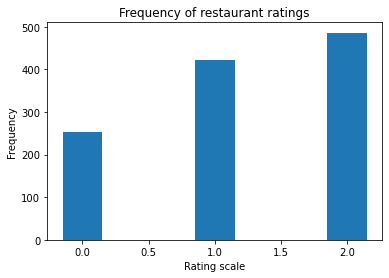

In [30]:
# frequency distribution of ratings
import numpy as np
import matplotlib.pyplot as plt

xAxis = np.array(data['rating'].unique(), int)
yAxis = data['rating'].value_counts()
plt.bar(xAxis, yAxis, width=0.3)
xlocs, xlabs = plt.xticks()
plt.title('Frequency of restaurant ratings')
plt.xlabel('Rating scale')
plt.ylabel('Frequency')
plt.show()

In [31]:
join = pd.merge(data, rest_info, how='inner', on = 'placeID')

# restaurants with best overall ratings
best_rated = join.groupby(['placeID', 'name'])['rating'].agg(rating = 'mean')
best_rated.sort_values('rating', ascending=False)

,,rating
placeID,name,
132955,emilianos,2.000000
134986,Restaurant Las Mananitas,2.000000
135034,Michiko Restaurant Japones,2.000000
132922,cafe punta del cielo,1.833333
132755,La Estrella de Dimas,1.800000
...,...,...
132560,puesto de gorditas,0.500005
132663,tacos abi,0.500005
135069,Abondance Restaurante Bar,0.500005


In [32]:
# restaurants with best food ratings
best_food_rated = join.groupby(['placeID', 'name'])['food_rating'].agg(rating = 'mean')
best_food_rated.sort_values('rating', ascending=False)

,,rating
placeID,name,
132667,little pizza Emilio Portes Gil,2.00
134986,Restaurant Las Mananitas,2.00
135034,Michiko Restaurant Japones,2.00
132755,La Estrella de Dimas,2.00
135013,Giovannis,2.00
...,...,...
135069,Abondance Restaurante Bar,0.50
132663,tacos abi,0.50
134987,Chilis Cuernavaca,0.50


In [33]:
# most visited restaurants
most_visited = join.groupby(['placeID', 'name'])['rating'].agg(count = 'count')
most_visited.sort_values('count', ascending=False)

,,count
placeID,name,
135085,Tortas Locas Hipocampo,36
132825,puesto de tacos,32
135032,Cafeteria y Restaurant El Pacifico,28
135052,La Cantina Restaurante,25
132834,Gorditas Doa Gloria,25
...,...,...
132766,Mikasa,3
132717,tortas hawai,3
135011,Los Vikingos,3


In [34]:
# least rated restaurants and their food & service ratings
least_rated = join.groupby(['placeID', 'name'])['rating'].agg(rating = 'mean')
least_rated.sort_values('rating', ascending=True)

,,rating
placeID,name,
135040,Restaurant los Compadres,0.250007
132654,Carnitas Mata Calle 16 de Septiembre,0.250007
135069,Abondance Restaurante Bar,0.500005
132560,puesto de gorditas,0.500005
132663,tacos abi,0.500005
...,...,...
132755,La Estrella de Dimas,1.800000
132922,cafe punta del cielo,1.833333
132955,emilianos,2.000000


In [35]:
join.loc[join['name'] == 'Restaurant los Compadres']

,userID,placeID,rating,food_rating,service_rating,name
921,U1126,135040,0.00001,0,0,Restaurant los Compadres
922,U1022,135040,0.00001,0,0,Restaurant los Compadres
923,U1105,135040,0.00001,0,0,Restaurant los Compadres
924,U1001,135040,1.00000,1,1,Restaurant los Compadres


In [36]:
join.loc[join['name'] == 'Carnitas Mata  Calle 16 de Septiembre']

,userID,placeID,rating,food_rating,service_rating,name
490,U1026,132654,0.00001,0,0,Carnitas Mata Calle 16 de Septiembre
491,U1129,132654,0.00001,0,0,Carnitas Mata Calle 16 de Septiembre
492,U1065,132654,1.00000,1,1,Carnitas Mata Calle 16 de Septiembre
493,U1130,132654,0.00001,0,0,Carnitas Mata Calle 16 de Septiembre


In [37]:
# most preferred cuisine
cuisines = pd.read_csv('C:/Users/snigd/Documents/PURDUE/Academics/MOD 1/Python/RCdata/usercuisine.csv')
cuisines['Rcuisine'].value_counts()

Mexican             97
American            11
Pizzeria             9
Cafeteria            9
Cafe-Coffee_Shop     8
                    ..
Fine_Dining          1
French               1
Dutch-Belgian        1
Thai                 1
Southwestern         1
Name: Rcuisine, Length: 103, dtype: int64

<AxesSubplot:>

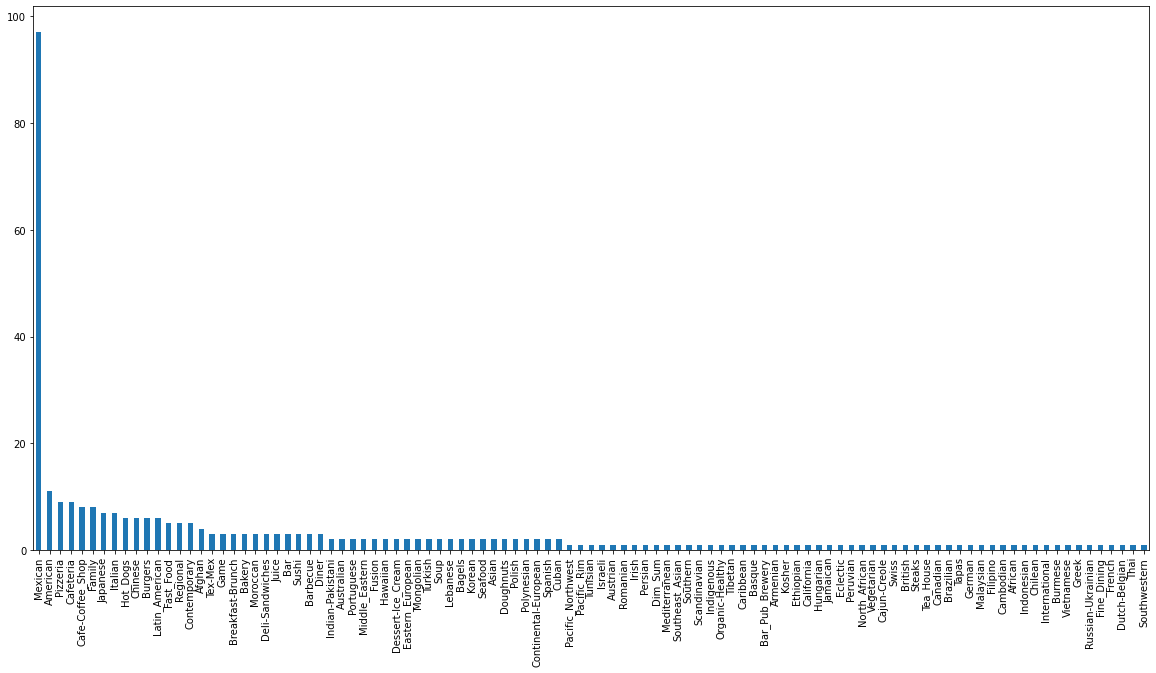

In [38]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

cuisines['Rcuisine'].value_counts().plot(kind='bar')

In [39]:
# rating criteria that matters more
from scipy.stats import pearsonr
x,y = pearsonr(data['rating'], data['food_rating'])
q,w = pearsonr(data['rating'], data['service_rating'])
print("The correlation between Overall rating & Food rating is : ", x)
print("The correlation between Overall rating & Service rating is : ", q)

The correlation between Overall rating & Food rating is :  0.7148546669062524
The correlation between Overall rating & Service rating is :  0.6907566105846137
